In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [7]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=10)

In [8]:
from sklearn.svm  import SVC
svc = SVC( kernel='rbf', C=20, gamma='auto', random_state=42)

In [9]:
def compute_score(X_train, y_train, X_test, y_test):
  svc.fit(X_train,y_train)
  return svc.score(X_test,y_test)

In [10]:
compute_score(X_train, y_train, X_test, y_test)

0.9777777777777777

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

svc_pipe = Pipeline([('scaler', MinMaxScaler()),
          ('svc', SVC(kernel='linear', decision_function_shape='ovr', class_weight=None))])

svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC(kernel='linear'))])

In [12]:
from sklearn.metrics import classification_report

y_pred = svc_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [13]:
df = load_iris()

In [14]:
print(df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Setosa is class 1

In [15]:
X2 = X[y!=1]
y2 = y[y!=1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5, random_state=0)

In [17]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                 ('classifier', SVC())])

pipe.fit(X_train, y_train)
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        24

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [18]:
from sklearn.svm import LinearSVC

svc3 = LinearSVC(loss='hinge', random_state=42, penalty='l2')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

def compute_score2(X_train, y_train, X_test, y_test):
  svc3.fit(X_train,y_train)
  return svc3.score(X_test,y_test)

compute_score2(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9777777777777777

In [19]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_search(kernel, regularization):
  pipe=Pipeline([('svc',SVC( ))])

  gscv = GridSearchCV(pipe, param_grid={'svc__kernel':kernel,'svc__C':regularization}, cv=10)

  gscv.fit(X_train,y_train)
  return gscv.score(X_test,y_test)

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
hyperparameter_search(kernel=['linear', 'rbf'], regularization=[5, 10,100])

0.9777777777777777

# Graded

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

kernels = ['linear' , 'rbf']
regularizations = [1,15,25]
def compute_GridSearchCV(kernels,regularizations):
  pipe = Pipeline([('svc', SVC(gamma='auto'))])
  gscv = GridSearchCV(pipe, param_grid={'svc__kernel': kernels, 'svc__C': regularizations},cv=4, return_train_score=True)
  gscv.fit(X_train, y_train)
  print(gscv.cv_results_['mean_train_score'].mean(), gscv.cv_results_['mean_test_score'].mean())
  print(f'best score: {gscv.best_score_}')

In [22]:
compute_GridSearchCV(kernels,regularizations)

0.9883425294817699 0.9541191832858501
best score: 0.9807692307692308


# Graded 

In [23]:
df = pd.read_csv('practice8.csv')

In [24]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [25]:
X = df[['Age','EstimatedSalary']]
y = df[['Purchased']]

In [26]:
X.shape, y.shape

((400, 2), (400, 1))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300, 1), (100, 1))

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

pipe = Pipeline([('scaler', StandardScaler()), 
          ('svc', SVC(kernel='linear', random_state=0))])

pipe.fit(X_train, y_train)

print(accuracy_score(y_test, pipe.predict(X_test)))

0.9


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


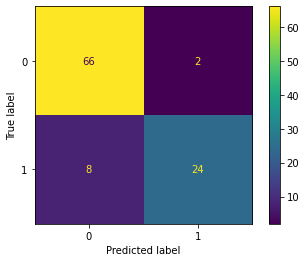

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, pipe.predict(X_test))


In [31]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [32]:
X_train, X_test, y_train, y_test = X[:20000], X[20000:25000], y[:20000], y[20000:25000]

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20000, 784), (5000, 784), (20000,), (5000,))

In [34]:
svc_pipe = Pipeline([('scaler', MinMaxScaler()),
          ('svc', SVC(kernel='linear', decision_function_shape='ovr', class_weight=None))])

svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC(kernel='linear'))])

In [35]:
svc_pipe = Pipeline([('scaler', MinMaxScaler()),
          ('svc', SVC(kernel='linear', decision_function_shape='ovr', class_weight=None))])

svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC(kernel='linear'))])

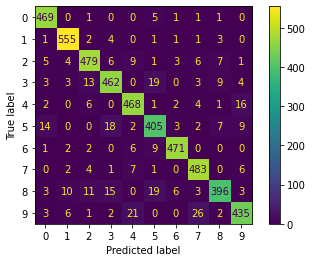

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, svc_pipe.predict(X_test))

In [37]:
con_matrix = confusion_matrix(y_test, svc_pipe.predict(X_test))
con_matrix.diagonal().sum()

4623

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       478
           1       0.95      0.98      0.97       568
           2       0.92      0.92      0.92       521
           3       0.91      0.90      0.90       516
           4       0.91      0.94      0.92       500
           5       0.88      0.88      0.88       460
           6       0.97      0.96      0.96       491
           7       0.91      0.96      0.94       504
           8       0.93      0.85      0.89       466
           9       0.92      0.88      0.90       496

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



In [39]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

In [40]:
svc_pipe = Pipeline([('scaler', StandardScaler()),
          ('svc', SVC(kernel='poly', degree=3, decision_function_shape='ovr', class_weight='balanced', C=10))])

svc_pipe.fit(X_train, y_train)
print(classification_report(y_test, svc_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.88      1.00      0.94        23
           2       1.00      0.87      0.93        23

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
def compute_score(X_train, y_train, X_test, y_test):
  svc = SVC(kernel='poly', C=10, gamma='auto')
  svc.fit(X_train, y_train)
  return svc.score(X_test, y_test)
compute_score(X_train, y_train, X_test, y_test)

0.9777777777777777

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
def compute_score(X_train, y_train, X_test, y_test):
  svc = SVC(kernel='sigmoid', C=25, gamma='auto')
  svc.fit(X_train, y_train)
  return svc.score(X_test, y_test)
compute_score(X_train, y_train, X_test, y_test)

0.28888888888888886

In [43]:
X_ = X[y!=0]
y_ = y[y!=0]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.25, random_state=0)

In [46]:
svc = SVC()
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25

